In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Reading the data into a pandas dataframe
train= pd.read_csv('train_data.csv')

In [8]:
train.shape

(54808, 14)

In [9]:
#printing first five rows of dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
train.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [11]:
#checking missing values
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
# Frequency of promoted vs non-promoted
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


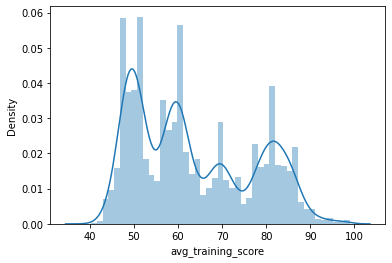

In [13]:
# Average training score distribution
sns.distplot(train['avg_training_score'])
plt.show()

In [14]:
# Frequency of awards won vs not won
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


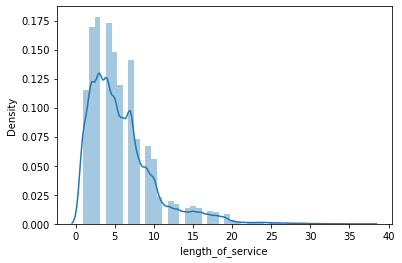

In [15]:
# Length of service distribution
sns.distplot(train['length_of_service'])
plt.show()

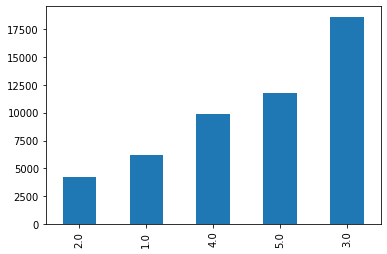

In [16]:
# Plotting previous year ratings
train['previous_year_rating'].value_counts().sort_values().plot.bar()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


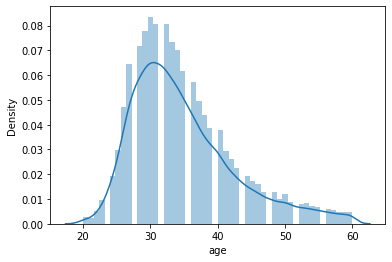

In [17]:
# Distribution of age
sns.distplot(train['age'])
plt.show()

In [18]:
# Frequency of male vs female
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

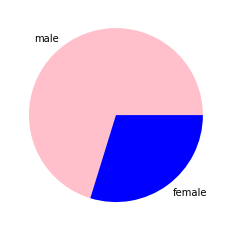

In [19]:
size=[38496, 16312]
labels= "male", "female"
colors= ['pink', 'blue']

plt.pie(size, labels=labels, colors= colors)
plt.show()

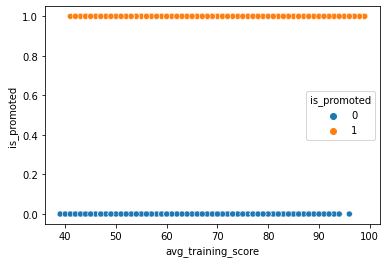

In [20]:
# Bi variate analysis of average training score
sns.scatterplot(data=train, x="avg_training_score", y="is_promoted", hue="is_promoted")

Inference- As training score increases, chances of promotion increases.

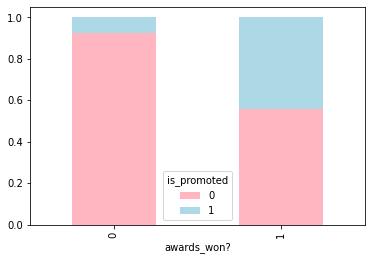

In [21]:
# Bi variate analysis of awards won vs promoted
data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True,  color = ['lightpink', 'lightblue'])
plt.show()
# 

Inference- As number of awards increases, promotion rate increases

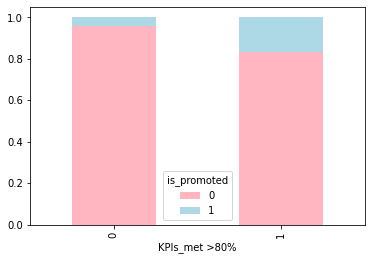

In [22]:
# Bi variate analysis of KPIs_met vs promoted
data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, color = ['lightpink', 'lightblue'])
plt.show()

Promotion chances increases if KPIs > 80 increases


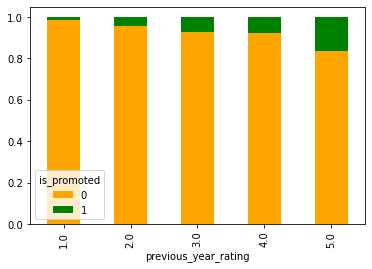

In [23]:
data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, color = ['orange', 'green'])
plt.show()

Promotion rate increases with increase in previous year rating

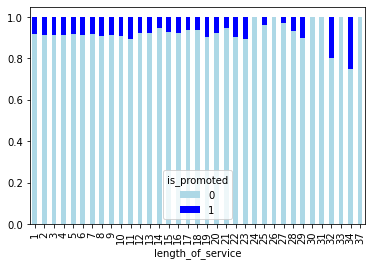

In [24]:
data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, color = ['lightblue', 'blue'])
plt.show()

No distinct behaviour of how it changes with length of service of employees

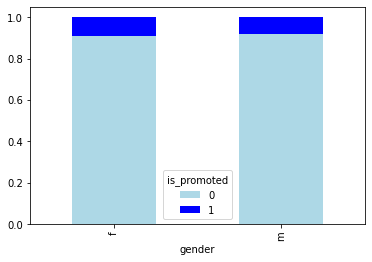

In [25]:
data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, color = ['lightblue', 'blue'])
plt.show()

Promotion chances doesn't depend on gender. 

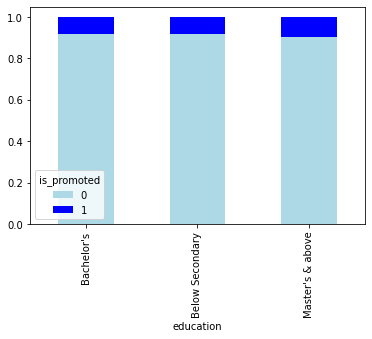

In [26]:
data = pd.crosstab(train['education'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, color = ['lightblue', 'blue'])
plt.show()

Increases more if one has a master's degree

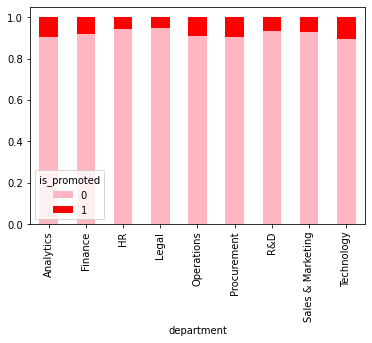

In [27]:
data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True,  color = ['lightpink', 'red'])
plt.show()

No clear distribution of how it varies with department

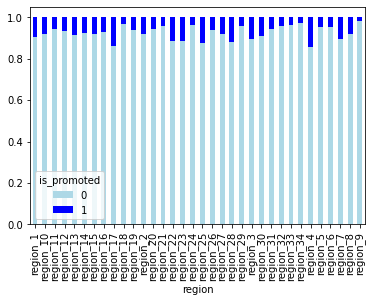

In [28]:
data = pd.crosstab(train['region'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True,  color = ['lightblue', 'blue'])
plt.show()

Doesn't depend on the region

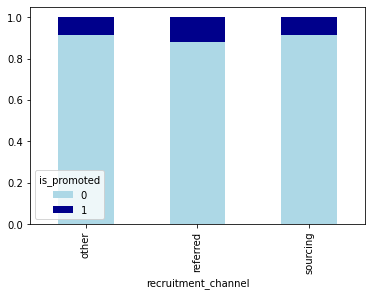

In [29]:
data = pd.crosstab(train['recruitment_channel'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, color = ['lightblue', 'darkblue'])
plt.show()

In [30]:
# Treating missing values
# filling missing values of education with mode & previous year rating with mean
train['education'].fillna(train['education'].mode()[0], inplace= True)
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(), inplace= True)

In [31]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [32]:
# Dropping unimportant columns- employee id & region
train = train.drop(['employee_id', 'region'], axis = 1)
train.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [33]:
# performing one hot encoding for categorical variables
data= pd.get_dummies(train, columns=['department', 'gender', 'recruitment_channel'], drop_first=True)

In [34]:
data.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,Master's & above,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,1
1,Bachelor's,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,1,0,0
2,Bachelor's,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,1,0,1
3,Bachelor's,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0
4,Bachelor's,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,1,0,0


In [35]:
# giving weights to categorical variable "education"
data['education'].replace("Master's & above",2,inplace=True)
data['education'].replace("Bachelor's",1,inplace=True)
data['education'].replace("Below Secondary",0,inplace=True)
data.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,1,0,0
2,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,1,0,1
3,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0
4,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,1,0,0


In [36]:
#x= select all columns until last, y should have only the promotion column
x= data.drop('is_promoted', axis=1)
y= data.loc[:, 'is_promoted']

In [37]:
x.shape


(54808, 19)

In [38]:
y.shape

(54808,)

In [39]:
# performing SMOTE oversampling due to imbalanced labels
from imblearn.over_sampling import SMOTE 
x_sample, y_sample= SMOTE().fit_sample(x, y.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [40]:
x_sample= pd.DataFrame(x_sample)
y_sample= pd.DataFrame(y_sample)

In [41]:
x_sample.shape

(100280, 19)

In [42]:
y_sample.shape

(100280, 1)

In [43]:
# Splitting data set into train & test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)
print("x train", x_train.shape)
print("x test", x_test.shape)
print("y train", y_train.shape)
print("y test", y_test.shape)

x train (80224, 19)
x test (20056, 19)
y train (80224, 1)
y test (20056, 1)


In [44]:
# Using StandardScaler package for normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
# Random Forest Algorithm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

# Using Grid Search CV to find optimal hyperparameters
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 4, None],
    'max_features': ['auto', 'sqrt', 'log2']
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())
print(cv.best_params_)

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}


In [53]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [54]:
# Accuracy of RFA
accuracy_score(y_test, y_pred)

0.9648484244116474

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9981
           1       0.98      0.95      0.96     10075

    accuracy                           0.96     20056
   macro avg       0.97      0.96      0.96     20056
weighted avg       0.97      0.96      0.96     20056



**Accuracy using Random Forest Algorithm is 96.48 %**

In [49]:
# Gradient Boosting Algorithm 
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
"""
parameters = {
    'n_estimators': [50, 250],
    'max_depth': [3, 5],
    'learning_rate': [ 0.1, 1]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())
print(cv.best_params_)
"""

"\nparameters = {\n    'n_estimators': [50, 250],\n    'max_depth': [3, 5],\n    'learning_rate': [ 0.1, 1]\n}\n\ncv = GridSearchCV(gb, parameters, cv=5)\ncv.fit(x_train, y_train.values.ravel())\nprint(cv.best_params_)\n"

In [50]:
gb.fit(x_train, y_train)
y_pred= gb.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Accuracy of gradient boosting
accuracy_score(y_test, y_pred)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      9981
           1       0.97      0.90      0.93     10075

    accuracy                           0.93     20056
   macro avg       0.94      0.93      0.93     20056
weighted avg       0.94      0.93      0.93     20056

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      9981
           1       0.97      0.90      0.93     10075

    accuracy                           0.93     20056
   macro avg       0.94      0.93      0.93     20056
weighted avg       0.94      0.93      0.93     20056



**Accuracy using Gradient Boosting Algorithm is 93.33 %**